In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import APL1_functions as AC


In [2]:
df = AC.data_loader("\\alpha5e-4\\python_driver\\SIM00000728\\structure_disk.outputdat")

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)


In [3]:
alpha = ['5e-4', '1e-4', '5e-3', '1e-3']
sim_numbers = range(1, 1001)   


In [4]:

file_paths = []

for ii in alpha:
    for jj in sim_numbers:
        sim_str = str(jj).zfill(4)  
        file_path = f"\\alpha{ii}\\python_driver\\SIM0000{sim_str}\\structure_disk.outputdat"
        file_paths.append(file_path)

In [5]:

file_paths_alpha_5e_minus_4 = file_paths[0:1000]
file_paths_alpha_1e_minus_4 = file_paths[1001:2000]
file_paths_alpha_5e_minus_3 = file_paths[2001:3000]
file_paths_alpha_1e_minus_3 = file_paths[3001:4000]




In [6]:
df = AC.data_loader(file_paths_alpha_5e_minus_4[0])
new_df = df[df.iloc[:, 9] == 0]

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)


In [7]:
cell_number = new_df[0]
disk_radius = new_df[1]
aspect_ratio = new_df[3]
time = new_df[9]

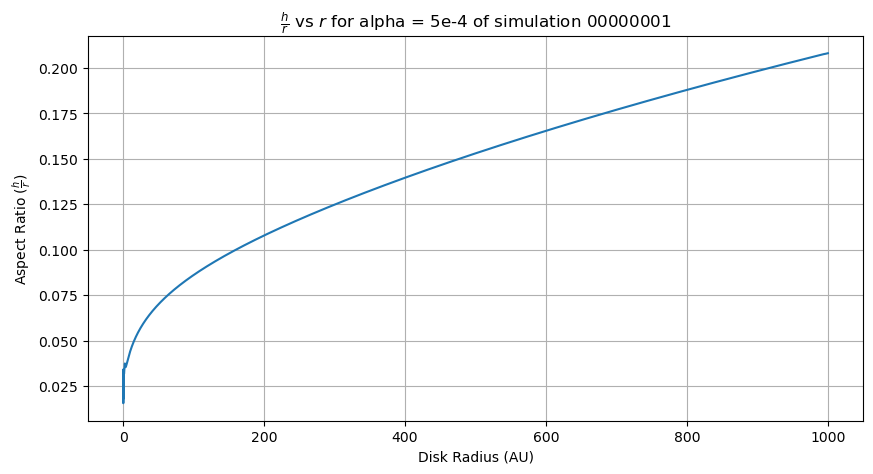

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(disk_radius, aspect_ratio)
plt.xlabel('Disk Radius (AU)')
plt.ylabel(r'Aspect Ratio ($\frac{h}{r}$)')
plt.title(r'$\frac{h}{r}$ vs $r$ for alpha = ' + str(alpha[0]) + ' of simulation 0000' + str(sim_str[0].zfill(4)))
plt.grid()

In [9]:
dfs_alpha_5e_minus_4 = []
for ii in range(len(file_paths_alpha_5e_minus_4)):
    df = AC.data_loader(file_paths_alpha_5e_minus_4[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_5e_minus_4.append(new_df)

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\

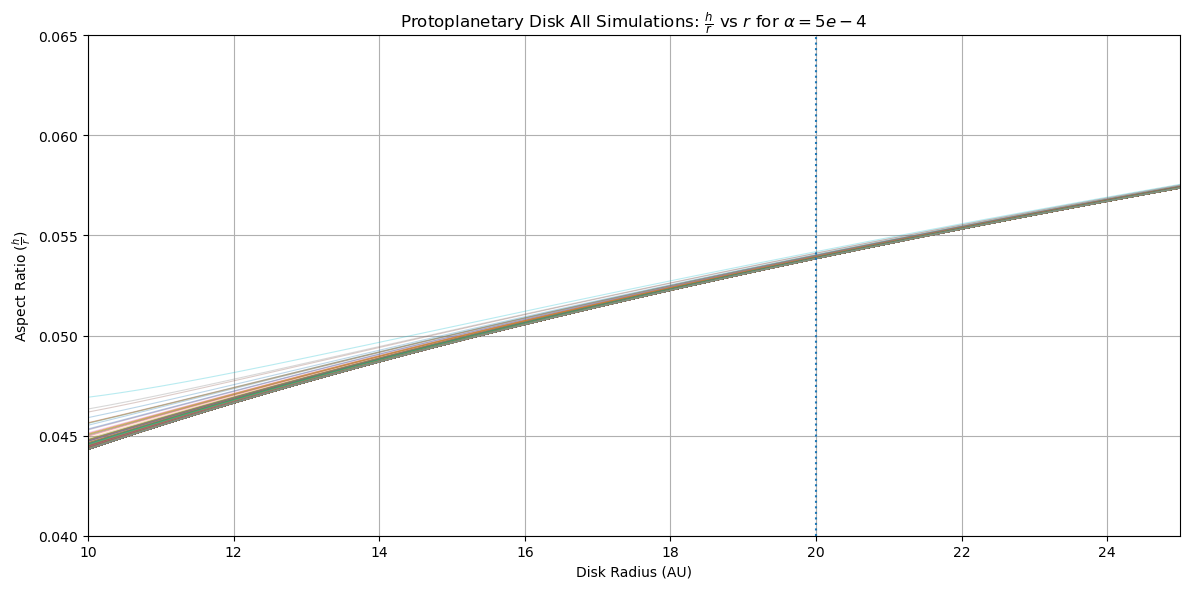

In [47]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_5e_minus_4:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"Protoplanetary Disk All Simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[0]) + "$")
plt.grid()
plt.tight_layout()
plt.axvline(20, linestyle=':')
plt.xlim(10, 25)
plt.ylim(0.04,.065)
plt.show()

In [46]:
target = 20

differences = np.abs(dfs_alpha_5e_minus_4[0][1] - target)
nearest_index = differences.argsort()[0]

print(nearest_index)

nearest_value = dfs_alpha_5e_minus_4[0][1].iloc[nearest_index]
print(f"Nearest value to {target} is {nearest_value}")


print(len(dfs_alpha_5e_minus_4[0]))
print(dfs_alpha_5e_minus_4[0][1][2075])

df_from_here = dfs_alpha_5e_minus_4[0][1].iloc[nearest_index:]

print(df_from_here)

2075
Nearest value to 20 is 20.017224
3400
20.017224
2075      20.017224
2076      20.076444
2077      20.135838
2078      20.195408
2079      20.255155
           ...     
3395     988.253340
3396     991.177000
3397     994.109320
3398     997.050310
3399    1000.000000
Name: 1, Length: 1325, dtype: float64


In [ ]:
target = 20
dfs_cut_alpha_5e_minus_4 = []
for ii in range(1000):
   
    df = dfs_alpha_5e_minus_4[ii]            # this is a DataFrame

    # find nearest row position based on column 1
    col1 = df[1]                              # or df.iloc[:, 1] if you prefer
    nearest_pos = (col1 - target).abs().to_numpy().argmin()

    # slice rows from nearest onward, keep only columns 1 and 3
    dfs_cut = df.iloc[nearest_pos:, [1, 3]]

    # (optional) reset index if you want a clean 0..N index
    # dfs_cut = dfs_cut.reset_index(drop=True)

    dfs_cut_alpha_5e_minus_4.append(dfs_cut)
    
  

In [ ]:
# dfs_cut_alpha_5e_minus_4[0]

,1,3
2075,20.017224,0.053883
2076,20.076444,0.053928
2077,20.135838,0.053973
2078,20.195408,0.054018
2079,20.255155,0.054063
...,...,...
3395,988.253340,0.207023
3396,991.177000,0.207306
3397,994.109320,0.207590
3398,997.050310,0.207807


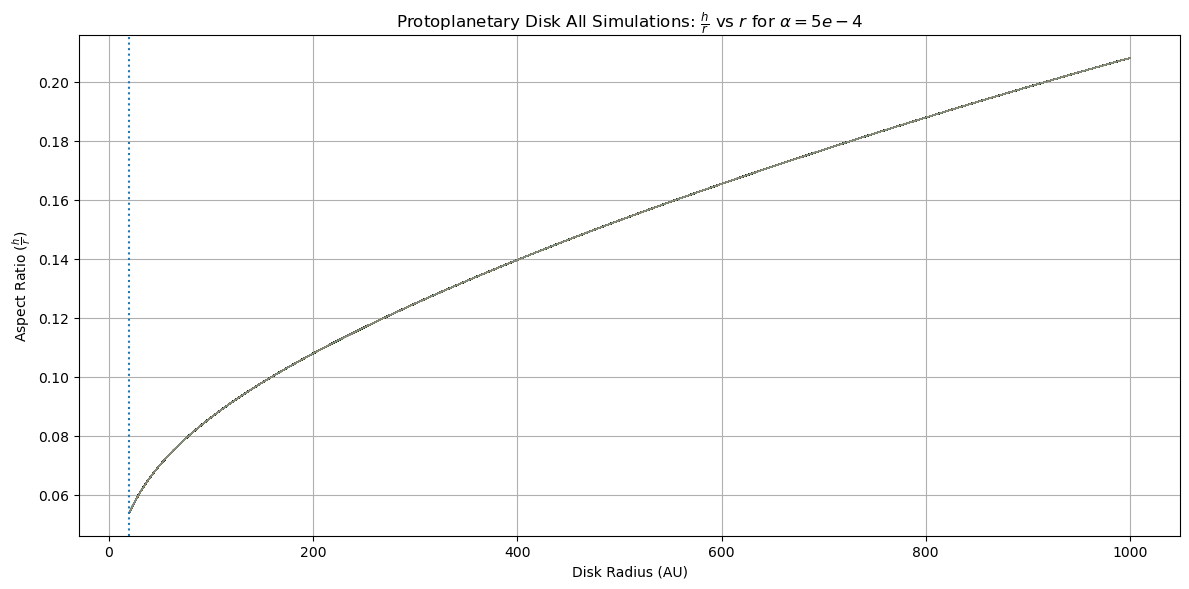

In [65]:
plt.figure(figsize=(12, 6))

for new_df in dfs_cut_alpha_5e_minus_4:
    disk_radius = new_df.iloc[:, 0]
    aspect_ratio = new_df.iloc[:, 1]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"Protoplanetary Disk All Simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[0]) + "$")
plt.grid()
plt.tight_layout()
plt.axvline(20, linestyle=':')
# plt.xlim(18, 25)
# plt.ylim(0.05,.055)
plt.show()

In [120]:

all_dfs = pd.concat(dfs_cut_alpha_5e_minus_4, ignore_index=True)

mean_aspect_ratio_5e4 = all_dfs.iloc[:, 1].mean()

print(f"Mean Aspect Ratio for alpha = 5e minus 4: {mean_aspect_ratio_5e4}")


Mean Aspect Ratio for alpha = 5e minus 4: 0.10706065687504354


In [11]:
dfs_alpha_1e_minus_4 = []
for ii in range(len(file_paths_alpha_1e_minus_4)):
    df = AC.data_loader(file_paths_alpha_1e_minus_4[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_1e_minus_4.append(new_df)

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\

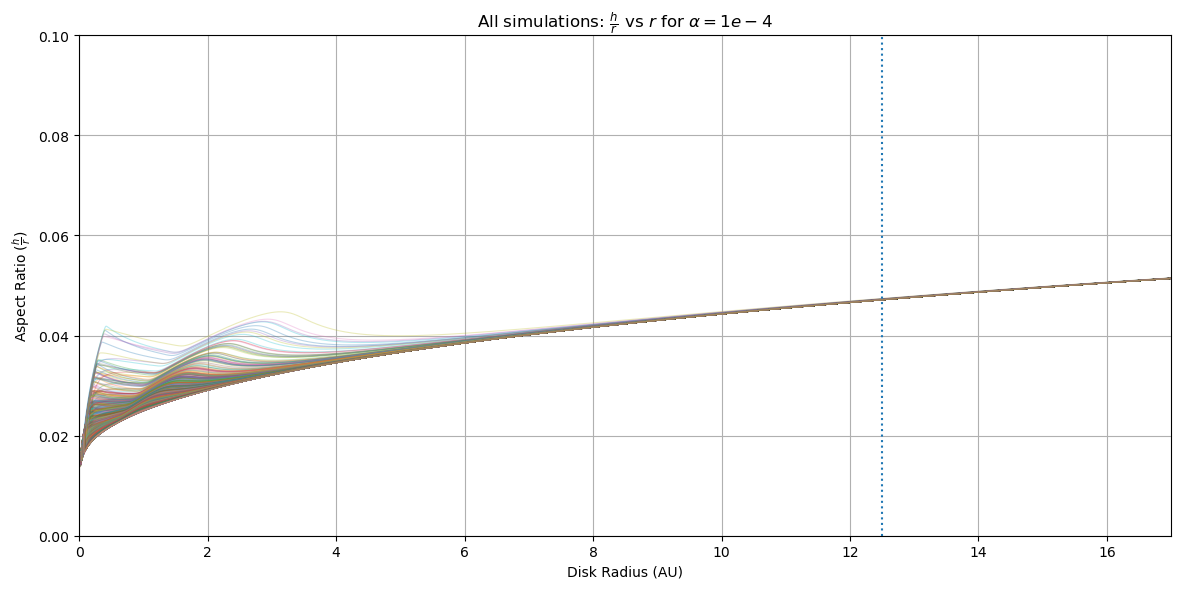

In [113]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_1e_minus_4:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"All simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[1]) + "$")
plt.grid()
plt.tight_layout()
plt.axvline(12.5, linestyle = ':')
plt.xlim(0, 17)
plt.ylim(0,.1)
plt.show()

In [97]:
print(len(dfs_alpha_1e_minus_4))

999


In [121]:
target = 12.5
dfs_cut_alpha_1e_minus_4 = []

for ii in range(999):
   
    df = dfs_alpha_1e_minus_4[ii]            # this is a DataFrame

    # find nearest row position based on column 1
    col1 = df[1]                              # or df.iloc[:, 1] if you prefer
    nearest_pos = (col1 - target).abs().to_numpy().argmin()

    # slice rows from nearest onward, keep only columns 1 and 3
    dfs_cut = df.iloc[nearest_pos:, [1, 3]]

    # (optional) reset index if you want a clean 0..N index
    # dfs_cut = dfs_cut.reset_index(drop=True)

    dfs_cut_alpha_1e_minus_4.append(dfs_cut)
    

all_dfs = pd.concat(dfs_cut_alpha_1e_minus_4, ignore_index=True)

mean_aspect_ratio_1e4 = all_dfs.iloc[:, 1].mean()

print(f"Mean Aspect Ratio for alpha = 1e minus 4: {mean_aspect_ratio_1e4}")

  

Mean Aspect Ratio for alpha = 1e minus 4: 0.1009878914567832


In [13]:
dfs_alpha_5e_minus_3 = []
for ii in range(len(file_paths_alpha_5e_minus_3)):
    df = AC.data_loader(file_paths_alpha_5e_minus_3[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_5e_minus_3.append(new_df)

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\

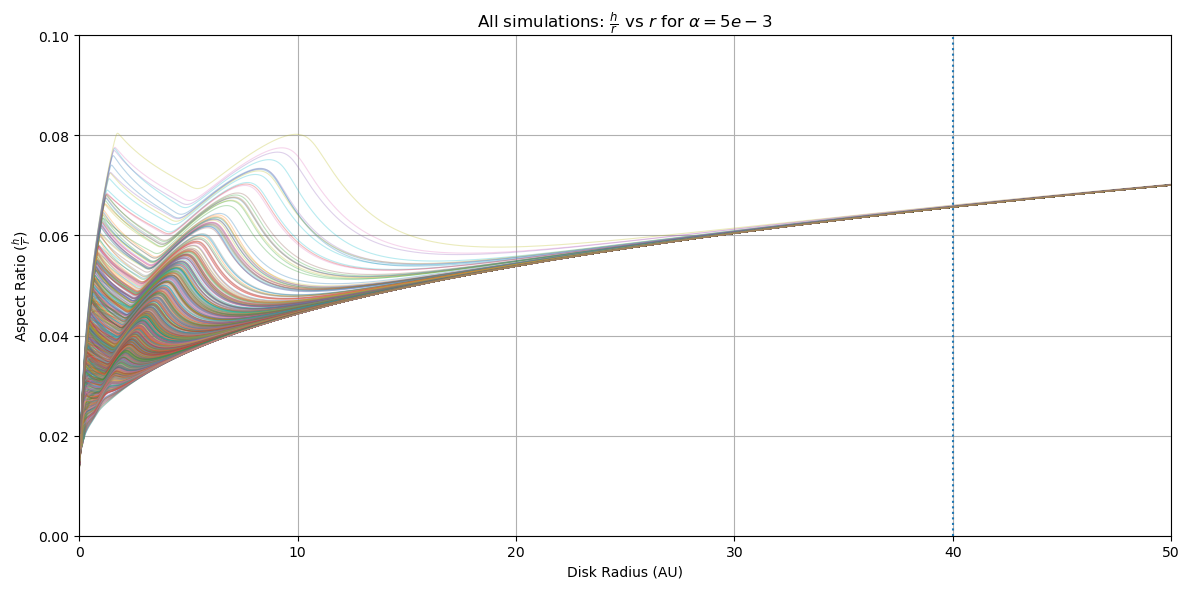

In [111]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_5e_minus_3:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"All simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[2]) + "$")
plt.grid()
plt.tight_layout()
plt.axvline(40, linestyle=':')
plt.xlim(0, 50)
plt.ylim(0,.1)
plt.show()

In [100]:
print(len(dfs_alpha_5e_minus_3))

999


In [122]:
target = 30
dfs_cut_alpha_5e_minus_3 = []

for ii in range(999):
   
    df = dfs_alpha_5e_minus_3[ii]            # this is a DataFrame

    # find nearest row position based on column 1
    col1 = df[1]                              # or df.iloc[:, 1] if you prefer
    nearest_pos = (col1 - target).abs().to_numpy().argmin()

    # slice rows from nearest onward, keep only columns 1 and 3
    dfs_cut = df.iloc[nearest_pos:, [1, 3]]

    # (optional) reset index if you want a clean 0..N index
    # dfs_cut = dfs_cut.reset_index(drop=True)

    dfs_cut_alpha_5e_minus_3.append(dfs_cut)
    

all_dfs = pd.concat(dfs_cut_alpha_5e_minus_3, ignore_index=True)

mean_aspect_ratio_5e3 = all_dfs.iloc[:, 1].mean()

print(f"Mean Aspect Ratio for alpha = 1e minus 4: {mean_aspect_ratio_5e3}")

  

Mean Aspect Ratio for alpha = 1e minus 4: 0.11284107521918753


In [15]:
dfs_alpha_1e_minus_3 = []
for ii in range(len(file_paths_alpha_1e_minus_3)):
    df = AC.data_loader(file_paths_alpha_1e_minus_3[ii])
    new_df = df[df.iloc[:, 9] == 0]
    
    dfs_alpha_1e_minus_3.append(new_df)

c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\\Users\\casey\\Downloads\\single_star_disks_pop 3\\single_star_disks_pop" + str(file_path), delim_whitespace=True, header=None)
c:\Users\casey\UnigeMasters\Astrophysics_Lab_Disc_Truncation\APL1_functions.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("C:\

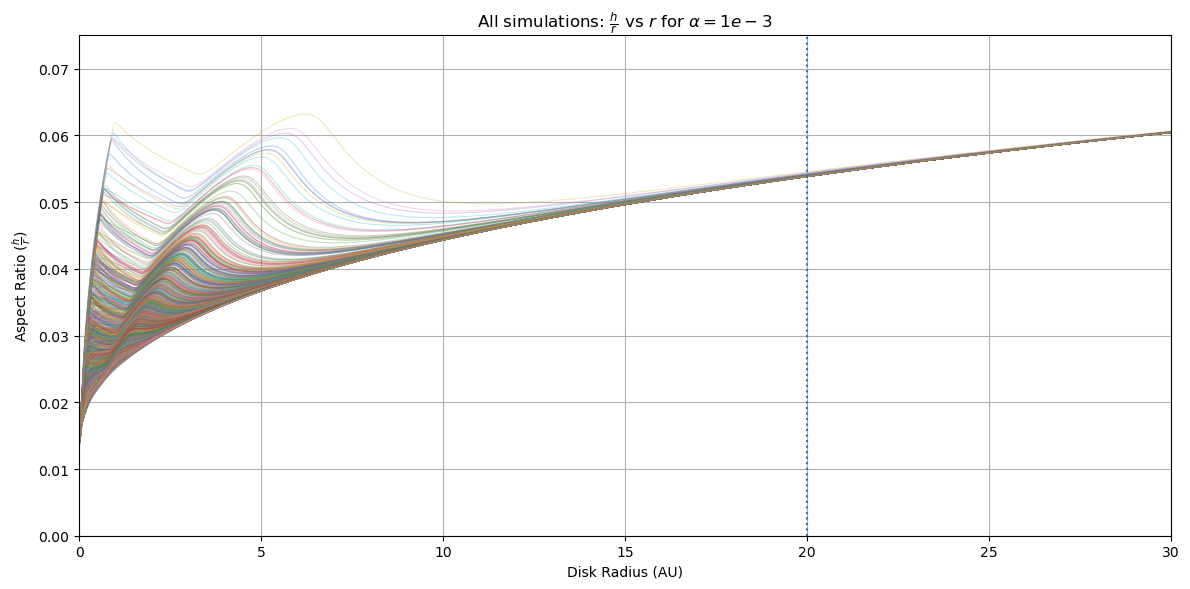

In [119]:
plt.figure(figsize=(12, 6))

for new_df in dfs_alpha_1e_minus_3:
    disk_radius = new_df.iloc[:, 1]
    aspect_ratio = new_df.iloc[:, 3]
    plt.plot(disk_radius, aspect_ratio, alpha=0.3, linewidth=0.8)

plt.xlabel("Disk Radius (AU)")
plt.ylabel(r"Aspect Ratio ($\frac{h}{r}$)")
plt.title(r"All simulations: $\frac{h}{r}$ vs $r$ for $\alpha = " + str(alpha[3]) + "$")
plt.grid()
plt.tight_layout()
plt.axvline(20, linestyle=':')
plt.xlim(0, 30)
plt.ylim(0,.075)
plt.show()

999


In [123]:
target = 20
dfs_cut_alpha_1e_minus_3 = []

for ii in range(999):
   
    df = dfs_alpha_1e_minus_3[ii]            # this is a DataFrame

    # find nearest row position based on column 1
    col1 = df[1]                              # or df.iloc[:, 1] if you prefer
    nearest_pos = (col1 - target).abs().to_numpy().argmin()

    # slice rows from nearest onward, keep only columns 1 and 3
    dfs_cut = df.iloc[nearest_pos:, [1, 3]]

    # (optional) reset index if you want a clean 0..N index
    # dfs_cut = dfs_cut.reset_index(drop=True)

    dfs_cut_alpha_1e_minus_3.append(dfs_cut)
    

all_dfs = pd.concat(dfs_cut_alpha_1e_minus_3, ignore_index=True)

mean_aspect_ratio_1e3 = all_dfs.iloc[:, 1].mean()

print(f"Mean Aspect Ratio for alpha = 1e minus 4: {mean_aspect_ratio_1e3}")

  

Mean Aspect Ratio for alpha = 1e minus 4: 0.10706164164920995


In [124]:
print(f"Mean Aspect Ratio for alpha = 5e minus 4: {mean_aspect_ratio_5e4}")
print(f"Mean Aspect Ratio for alpha = 1e minus 4: {mean_aspect_ratio_1e4}")
print(f"Mean Aspect Ratio for alpha = 5e minus 3: {mean_aspect_ratio_5e3}")
print(f"Mean Aspect Ratio for alpha = 1e minus 3: {mean_aspect_ratio_1e3}")

Mean Aspect Ratio for alpha = 5e minus 4: 0.10706065687504354
Mean Aspect Ratio for alpha = 1e minus 4: 0.1009878914567832
Mean Aspect Ratio for alpha = 5e minus 3: 0.11284107521918753
Mean Aspect Ratio for alpha = 1e minus 3: 0.10706164164920995
